# PROPAGAÇÃO SIMPLES DE FEIXES

Com o módulo `optical.beam.propagation` podemos também, com base num feixe computado, estimar a propagação da luz ao longo de meios ópticos. Novamente aqui faremos primeiramente algumas pré-definições para a execução das células de código.

In [1]:
%cd -q ../../
from optical import beam
# módulo numpy: utilizado na computação de matrizes
import numpy as np
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

# construção da região simulada do plano transverso
x = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40
y = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40

X, Y = np.meshgrid(x, y);           # malha de pontos do plano transverso

# computação do feixe em z = 0
G0 = beam.create_G(
    w0 = 10.0,
    region = (X, Y),
    incidence = beam.incidence(1.0, (45.0, 0.0))
);

# configuração dos gráficos
layout = lambda titulo: go.Layout(
    title = titulo,
    title_x = 0.5,                  # centraliza o título
    xaxis = dict(title = 'x(μm)'),
    yaxis = dict(title = 'y(μm)'),
    width = 900,
    height = 850
);

cmap = {
    'intensidade': 'inferno',
    'fase': 'greys'
};

## Criação elementar de meios ópticos

Elementarmente, um meio óptico é definido unicamente pelo seu índice de refração `n0`, assim o módulo `optical.medium` permite a criação de meios ópticos simples.

In [2]:
# importa o módulo medium dessa biblioteca
import optical.medium as medium

vidro = medium.create(n0 = 1.0);

### Estimativa da propagação da luz num meio óptico

Para estimar a propagação de feixes em meios ópticos, a forma mais elementar consiste na propagação pelo método `optical.beam.propagation.splitstep` que computa a propagação da luz com base em métodos espectrais (via transformada de Fourier).

> `optical.beam.propagation.splitstep(U, region = (X,Y), Z, medium)`
>
>> Estima, ao longo de `Z` (partição de pontos do eixo das cotas) pelo método de split-step, o feixe `U` propagado através de `medium` (meio óptico) nos pontos de `region` (malha de pontos com as coordenadas da janela computacional).

In [3]:
# importa o método splitstep como beampropagate
from optical.beam.propagation import splitstep as beampropagate

z = np.linspace(0.0, +50.0, 1000);  # 1000 pontos entre 0 e +50

# estimativa da propagação do feixe gaussiano ao longo do meio óptico
G = beampropagate(
    U = G0,
    wavelength = 640.0e-3,
    region = (X, Y),
    Z = z,
    medium = vidro
);

#### Perfil inicial

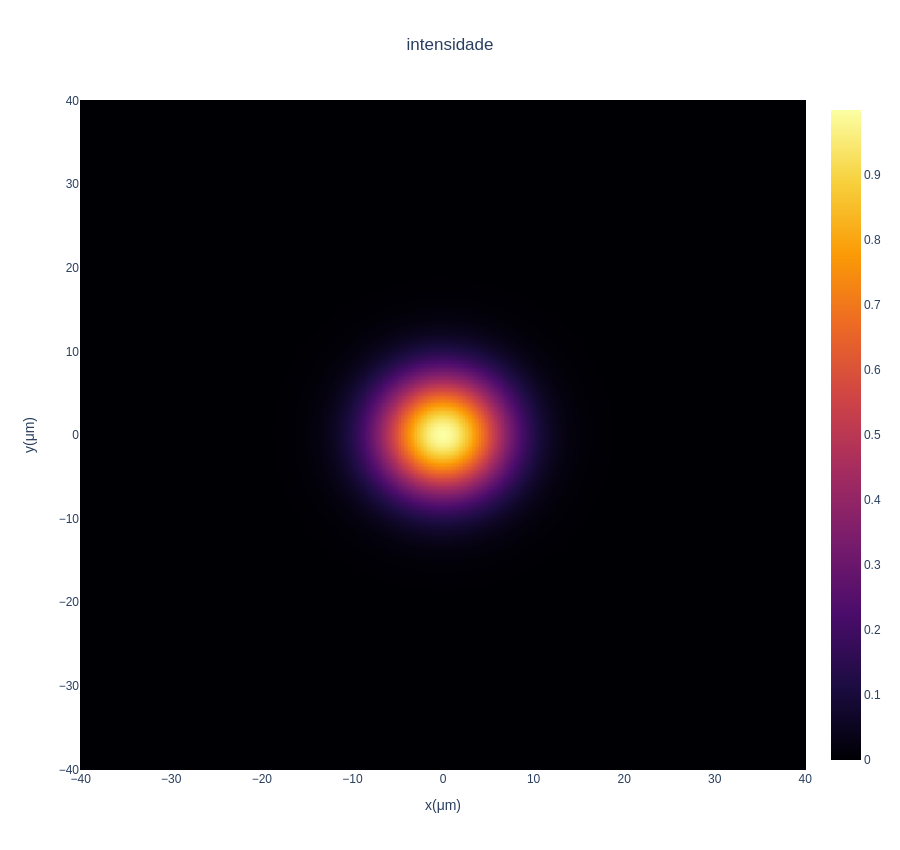

In [4]:
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(G0) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

intensityGraph.show("png");

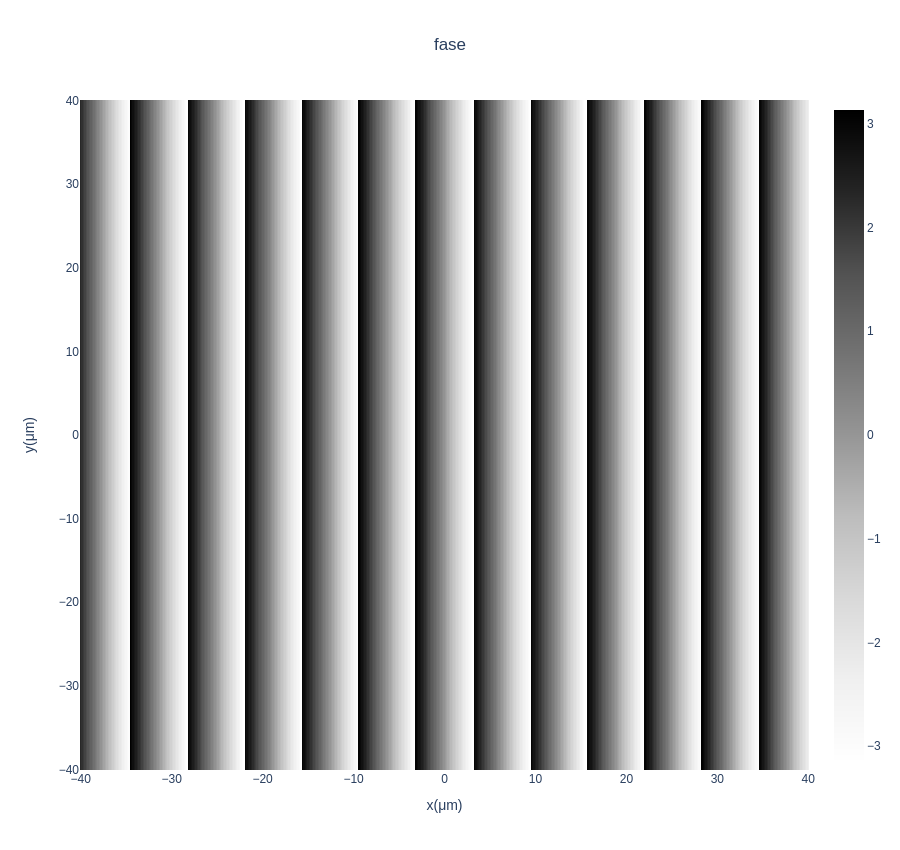

In [5]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(G0),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");

#### Perfil propagado

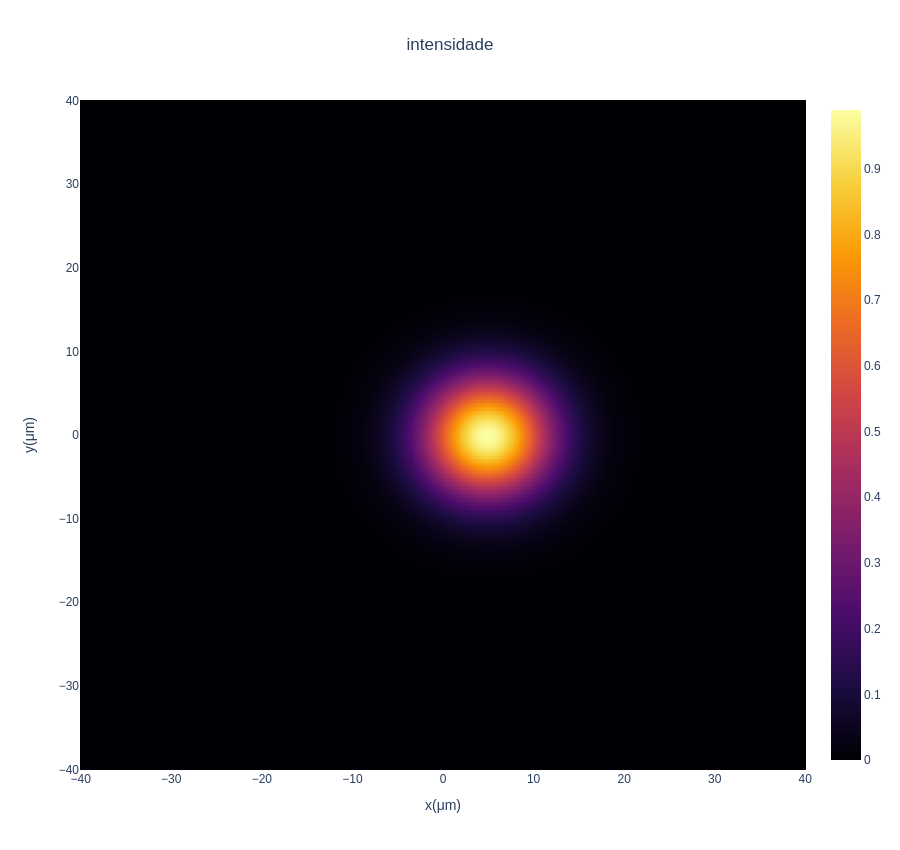

In [6]:
intensityGraph = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(G) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

intensityGraph.show("png");

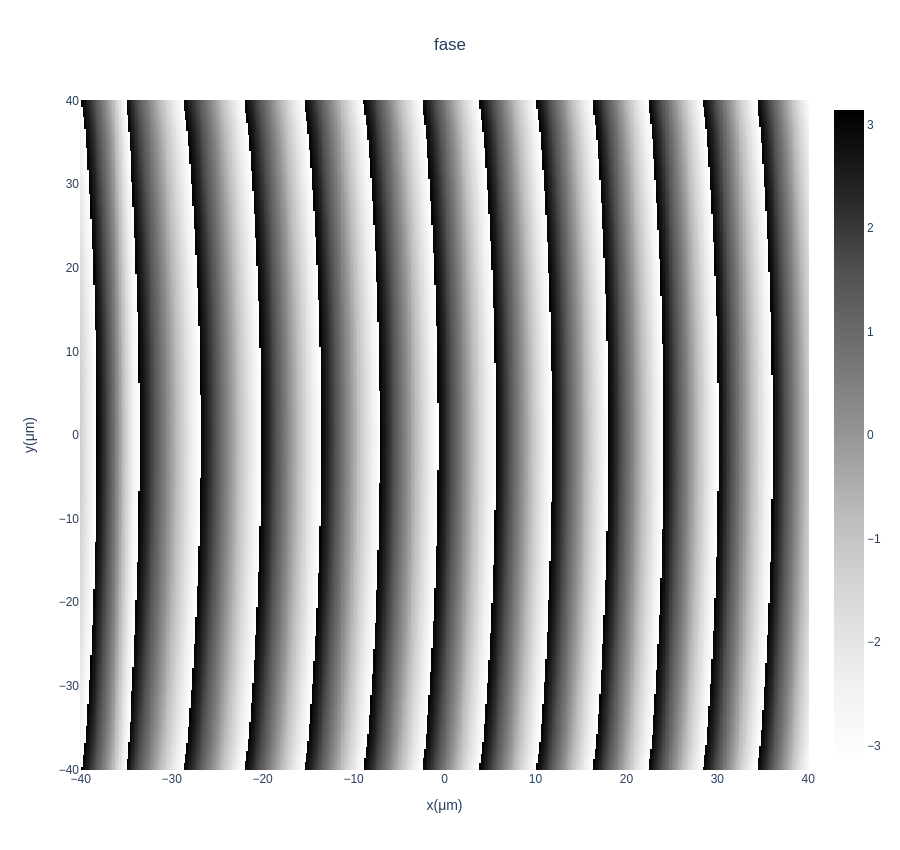

In [7]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(G),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");